In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/credit_customers.csv')
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [4]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [5]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [6]:
data.shape

(1000, 21)

In [7]:
data.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [8]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

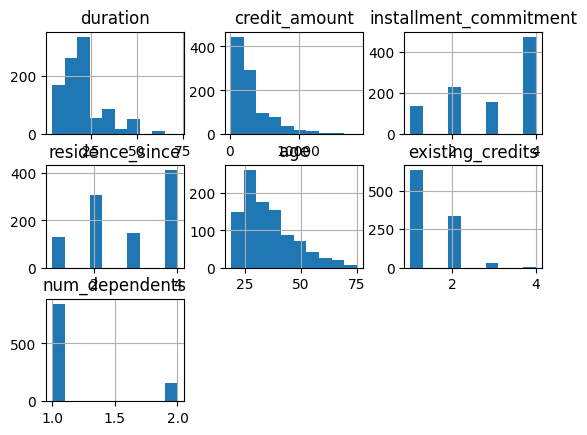

In [9]:
data.hist()
plt.show()

In [10]:
data['savings_status'].value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [11]:
data.replace({'savings_status':{'no known savings':'<100'}},inplace=True)

In [12]:
data['savings_status'].value_counts()

<100           786
100<=X<500     103
500<=X<1000     63
>=1000          48
Name: savings_status, dtype: int64

In [13]:
data['savings_status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: savings_status
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [14]:
data['savings_status'].describe()

count     1000
unique       4
top       <100
freq       786
Name: savings_status, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.select_dtypes(include="object").columns.tolist():
    data[i] = le.fit_transform(data[i])
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,2,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0


In [16]:
X=data.drop(['class'],axis=1)
y=data['class']

In [17]:
X.shape,y.shape

((1000, 20), (1000,))

In [18]:
X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(data)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [21]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (700, 21)
X_test shape: (300, 21)
y_train shape: (700,)
y_test shape: (300,)


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(max_iter=1000)
model1.fit(X_train,y_train)
y1_pred=model1.predict(X_test)

In [24]:
print('Logistic Regression:')
print()
acc1=accuracy_score(y_test,y1_pred)
print('Accuracy score:',acc1)
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y1_pred))
print()
print('Classification report:\n',classification_report(y_test,y1_pred))

Logistic Regression:

Accuracy score: 1.0

Confusion matrix:
 [[ 91   0]
 [  0 209]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       209

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [25]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
y2_pred=model2.predict(X_test)

In [26]:
print('K Neighbors Classifier:')
print()
acc2=accuracy_score(y_test,y2_pred)
print('Accuracy score:',acc2)
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y2_pred))
print()
print('Classification report:\n',classification_report(y_test,y2_pred))

K Neighbors Classifier:

Accuracy score: 0.9966666666666667

Confusion matrix:
 [[ 90   1]
 [  0 209]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        91
           1       1.00      1.00      1.00       209

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [27]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(X_train,y_train)
y3_pred=model3.predict(X_test)

In [28]:
print('SVM:')
print()
acc3=accuracy_score(y_test,y3_pred)
print('Accuracy score:',accuracy_score(y_test,y3_pred))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y3_pred))
print()
print('Classification report:\n',classification_report(y_test,y3_pred))

SVM:

Accuracy score: 1.0

Confusion matrix:
 [[ 91   0]
 [  0 209]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       209

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [29]:
results=pd.DataFrame({
    'Models':['LogisticRegression','KNeighbours','SVM',],
    'Score': [acc1*100 , acc2*100 ,acc3*100]}).sort_values(by='Score',ascending=False)
results

,Models,Score
0,LogisticRegression,100.000000
2,SVM,100.000000
1,KNeighbours,99.666667


<Axes: xlabel='Models'>

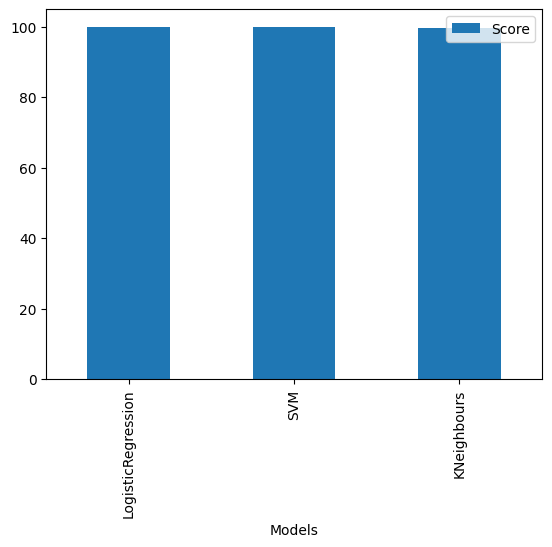

In [30]:
results.plot.bar(x='Models',y='Score')